In [1]:
import numpy as np
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.io import wavfile
import simpleaudio
import os
import time
from tqdm import tqdm
import scipy.integrate as integrate

In [2]:
L =  25.5 * 0.0254 
ls = 90 
nx = int(ls * L) # Total sample positions
xs = np.linspace(0,  L, nx+1, dtype=np.float64)

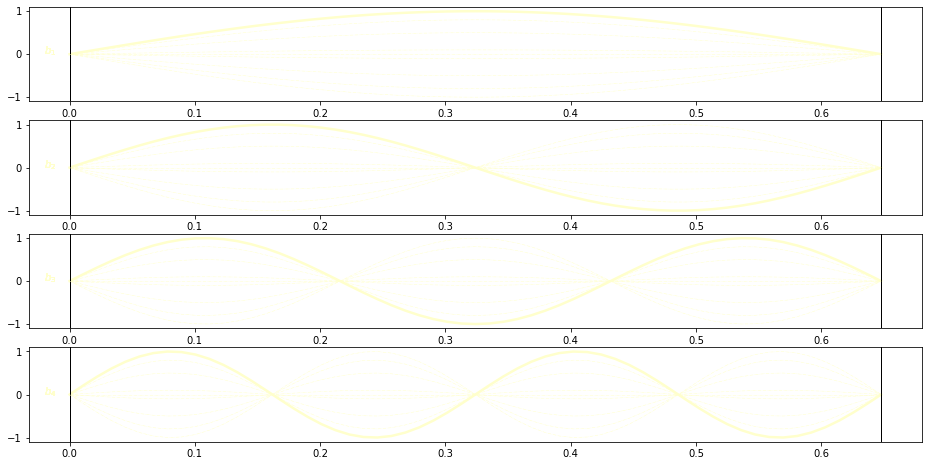

In [7]:
fig, axs = plt.subplots(4,1, figsize=(16, 8))
nums = [1, 0.8, 0.5, 0.1, 0, -0.1, -0.5, -0.8, -1]
# nums = [1]

for k in range(4):
    us = np.sin(2*np.pi*xs/(2*L/(k+1)))
    for i in range(len(nums)):
        axs[k].axvline(x = 0,  color='k', linestyle='-', linewidth=1)
        axs[k].axvline(x = L,  color='k', linestyle='-', linewidth=1)
        axs[k].annotate('$b_{}$'.format(k+1), (0-0.02, 0), color='#ffffcc')
        if i == 0:
            axs[k].plot(xs, nums[i]*us, color='#ffffcc', lw=2.5)
        else:
            axs[k].plot(xs, nums[i]*us, color='#ffffcc', ls='-.', lw=0.5)
plt.savefig('standing.png', transparent=True)            
plt.show()

In [8]:
def fourier(li, lf, n, f):
    l = (lf-li)/2
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    A = np.zeros((n))
    B = np.zeros((n))
    for i in range(1,n+1):
        A[i-1]=1/l*integrate.quad(lambda x: f(x)*np.cos(i*np.pi*x/l), li, lf)[0]
        B[i-1]=1/l* integrate.quad(lambda x: f(x)*np.sin(i*np.pi*x/l), li, lf)[0]
    return [a0/2.0, A, B]

## Demo 1

In [9]:
def triangle(x, A=(0.18, 0.01)):
    x0, y0 = A
    L =  25.5 * 0.0254
    if x>=0 and x < x0:
        return (y0/x0)*x
    elif x >=x0 and x<=2*L-x0:
        return (x-x0)*y0/(x0-L) + y0
    elif x > 2*L-x0 and x <= 2*L:
        return (x - 2*L + x0)*y0/x0 - y0

In [10]:
# Limits for the functions
li = 0
lf = 2*L 
# Number of harmonic terms
n = 10
# Fourier coeffficients for various functions
coeffs = fourier(li,lf,n,triangle)
bn = coeffs[2]

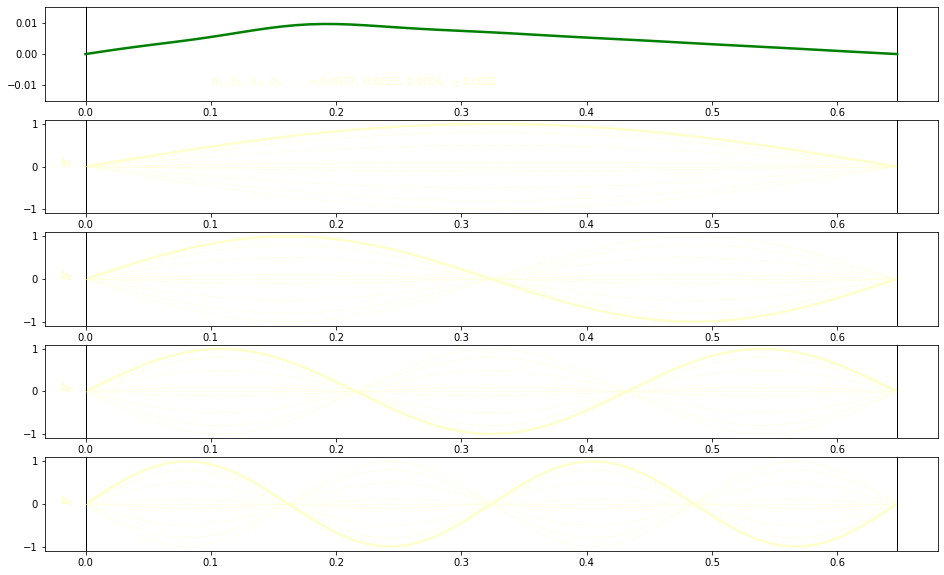

In [16]:
fig, axs = plt.subplots(5,1, figsize=(16, 10))
nums = [1, 0.8, 0.5, 0.1, 0, -0.1, -0.5, -0.8, -1]
u_est = np.zeros_like(xs)
for i in range(len(bn)):
    u_est = u_est + bn[i] * np.sin(2*np.pi*xs/(2*L/(i+1)))


axs[0].axvline(x = 0,  color='k', linestyle='-', linewidth=1)
axs[0].axvline(x = L,  color='k', linestyle='-', linewidth=1)
axs[0].set_ylim(-0.015, 0.015)
axs[0].plot(xs, u_est, color='green', lw=2.5)
axs[0].annotate('$b_1, \\ b_2, \\ b_3, \\ b_4, \\ ... \\ = {:.4f},\\  {:.4f},\\  {:.4f},\\  {:.4f}$'.format(bn[0],bn[1],bn[2],bn[3]), (0.1, -0.01), color='#ffffcc')
for k in range(1,5):
    us = np.sin(2*np.pi*xs/(2*L/(k)))
    for i in range(len(nums)):
        axs[k].axvline(x = 0,  color='k', linestyle='-', linewidth=1)
        axs[k].axvline(x = L,  color='k', linestyle='-', linewidth=1)
        axs[k].annotate('$b_{}$'.format(k), (0-0.02, 0), color='#ffffcc')
        if i == 0:
            axs[k].plot(xs, nums[i]*us, color='#ffffcc', lw=2.5)
        else:
            axs[k].plot(xs, nums[i]*us, color='#ffffcc', ls='-.', lw=0.5)
plt.savefig('hole_p.png', transparent=True)            
plt.show()

# Demo 2

In [17]:
def triangle(x, A=(L/2, 0.01)):
    x0, y0 = A
    L =  25.5 * 0.0254
    if x>=0 and x < x0:
        return (y0/x0)*x
    elif x >=x0 and x<=2*L-x0:
        return (x-x0)*y0/(x0-L) + y0
    elif x > 2*L-x0 and x <= 2*L:
        return (x - 2*L + x0)*y0/x0 - y0

In [18]:
# Limits for the functions
li = 0
lf = 2*L 
# Number of harmonic terms
n = 10
# Fourier coeffficients for various functions
coeffs = fourier(li,lf,n,triangle)
bn = coeffs[2]

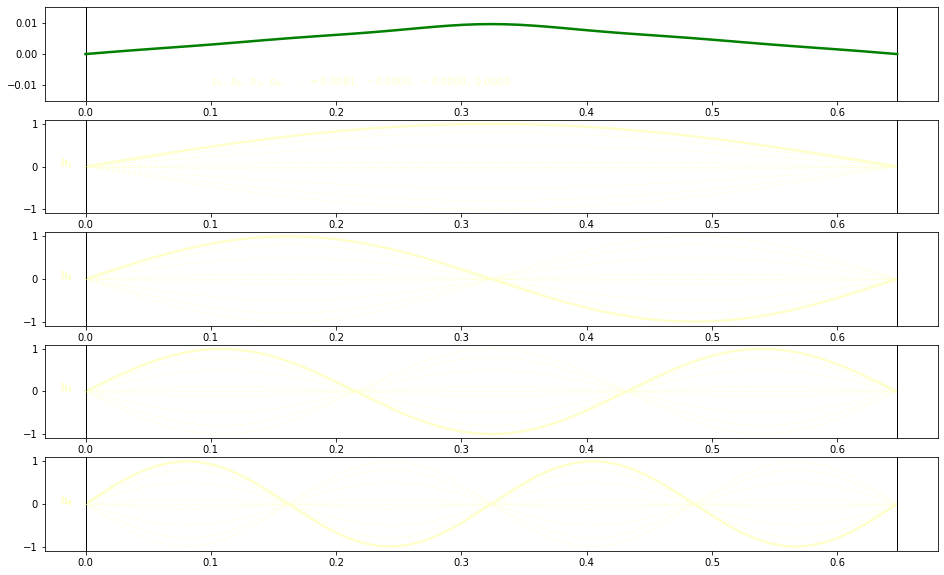

In [19]:
fig, axs = plt.subplots(5,1, figsize=(16, 10))
nums = [1, 0.8, 0.5, 0.1, 0, -0.1, -0.5, -0.8, -1]
u_est = np.zeros_like(xs)
for i in range(len(bn)):
    u_est = u_est + bn[i] * np.sin(2*np.pi*xs/(2*L/(i+1)))


axs[0].axvline(x = 0,  color='k', linestyle='-', linewidth=1)
axs[0].axvline(x = L,  color='k', linestyle='-', linewidth=1)
axs[0].set_ylim(-0.015, 0.015)
axs[0].plot(xs, u_est, color='green', lw=2.5)
axs[0].annotate('$b_1, \\ b_2, \\ b_3, \\ b_4, \\ ... \\ = {:.4f},\\  {:.4f},\\  {:.4f},\\  {:.4f}$'.format(bn[0],bn[1],bn[2],bn[3]), (0.1, -0.01), color='#ffffcc')
for k in range(1,5):
    us = np.sin(2*np.pi*xs/(2*L/(k)))
    for i in range(len(nums)):
        axs[k].axvline(x = 0,  color='k', linestyle='-', linewidth=1)
        axs[k].axvline(x = L,  color='k', linestyle='-', linewidth=1)
        axs[k].annotate('$b_{}$'.format(k), (0-0.02, 0), color='#ffffcc')
        if i == 0:
            axs[k].plot(xs, nums[i]*us, color='#ffffcc', lw=2.5)
        else:
            axs[k].plot(xs, nums[i]*us, color='#ffffcc', ls='-.', lw=0.5)
plt.savefig('center_p.png', transparent=True)            
plt.show()

$$f(x)=\frac{a_{0}}{2}+\sum_{n=1}^{\infty}\left[a_{n} \cos \frac{n \pi x}{L}+b_{n} \sin \frac{n \pi x}{L}\right]$$

$$a_{0}=\frac{1}{L} \int_{2 L} f(x) d x$$
$$a_{n}=\frac{1}{L} \int_{2 L} f(x) \cos \frac{n \pi x}{L} d x$$
$$b_{n}=\frac{1}{L} \int_{2 L} f(x) \sin \frac{n \pi x}{L} d x$$

Ref:
1. https://www.bragitoff.com/2021/05/fourier-series-coefficients-and-visualization-python-program/
2. https://physics.stackexchange.com/questions/111780/why-do-harmonics-occur-when-you-pluck-a-string

In [64]:
# center = coeffs[2]

NameError: name 'hole' is not defined

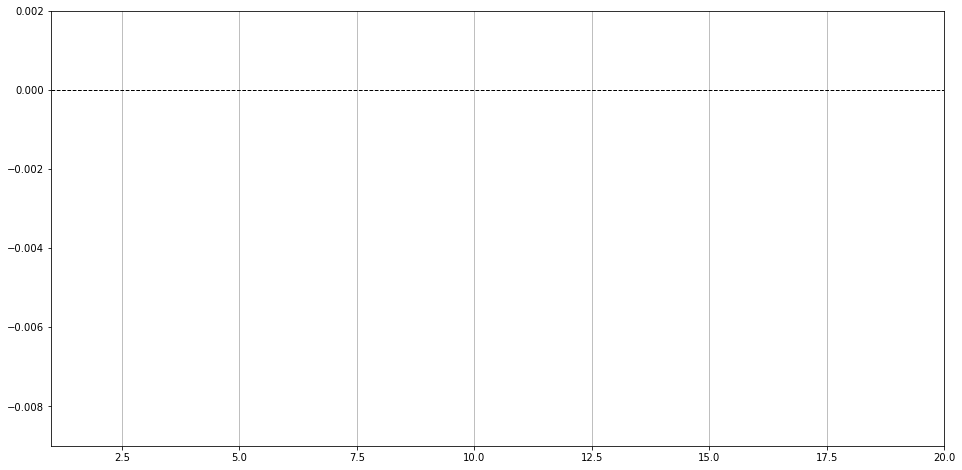

In [65]:
plt.figure(figsize=(16, 8))
plt.grid(axis='x')
plt.xlim(1, 20)
plt.ylim(-0.009, 0.002)
plt.axhline(y = 0,  color='k', linestyle='--', linewidth=1)
x = [i+1 for i in range(20)]
plt.scatter(x, hole)
plt.scatter(x, center)

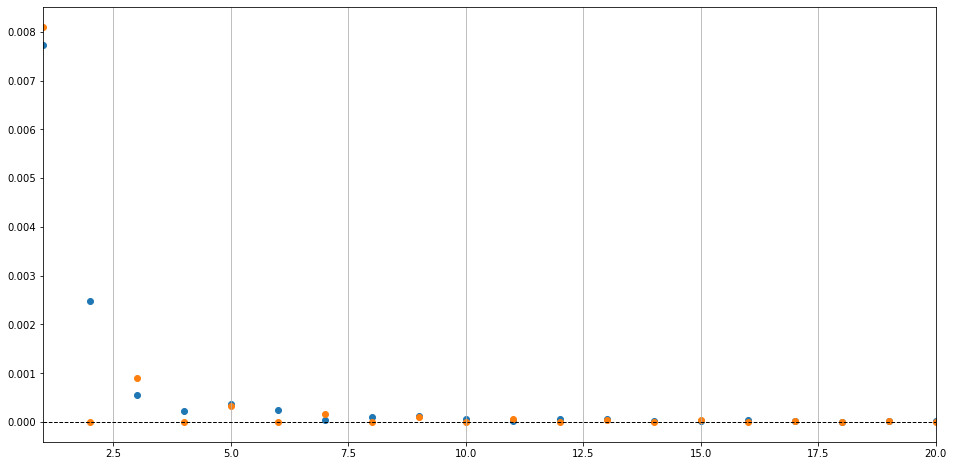

In [131]:
plt.figure(figsize=(16, 8))
plt.grid(axis='x')
plt.xlim(1, 20)
# plt.ylim(-0.009, 0.002)
plt.axhline(y = 0,  color='k', linestyle='--', linewidth=1)
x = [i+1 for i in range(20)]
plt.scatter(x, np.abs(hole))
plt.scatter(x, np.abs(center))